In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from uedge import *
from uedge.hdf5 import *
#import plotmesh as pm
from uetools import Case
from uedge.gridue import write_gridue
from Forthon import gchange

UEDGE configuration file /home/sseethalla25/.uetoolsrc read.


# Create Case from YAML

In [11]:
#c = Case('reconverged_v12_p3.93_n2.38_imp1e4_dp0.06_kep0.06_kip0.0226_last_ii2.hdf5')
#c = Case('baseline_v12_p3.93_n2.38_imp1e4_dp0.06_kep0.06_kip0.0226_last_ii2.hdf5')
c = Case('input_coarse_lowpuff.yaml')
print("dif_use, kye_use, kyi_use around SOL:", bbb.dif_use[28, :, 0][1], bbb.kye_use[28, :][1], bbb.kyi_use[28, :][1])
#if bbb.dif_use[30, :, 0][1] == c_dif and bbb.kye_use[30, :][1] == c_kye and bbb.kyi_use[30, :][1] == c_kyi:
   # pass
#else:
    #print(f'Diffusivities or chi values not matching!', file=sys.stderr)
# fnorm for final=1.65e+00

No diffusivity-file supplied: reading from save-file ".../jupyter/force_balance_test/fb_puff_coarse=1e-1_last_ii2.hdf5"
  User-specified diffusivities read from HDF5 file ".../jupyter/force_balance_test/fb_puff_coarse=1e-1_last_ii2.hdf5"
UETOOLS-style save successfully restored from .../jupyter/force_balance_test/fb_puff_coarse=1e-1_last_ii2.hdf5

*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 1.14e+02

dif_use, kye_use, kyi_use around SOL: 0.05787500000000001 0.05787500000000001 0.0215375


In [12]:
c = Case('fb_puff_coarse=250_igaso=700_last_ii2.hdf5')

Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../jupyter/force_balance_test/fb_puff_coarse=250_igaso=700_last_ii2.hdf5
  User-specified diffusivities read from HDF5 file ".../jupyter/force_balance_test/fb_puff_coarse=250_igaso=700_last_ii2.hdf5"
UETOOLS-style save successfully restored from .../jupyter/force_balance_test/fb_puff_coarse=250_igaso=700_last_ii2.hdf5

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 2.88e-02



# Converge

In [4]:
#bbb.afracs = 1.e-4
bbb.afracs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(54, 24))

In [ ]:
#bbb.pcoree = 1.96e6
#bbb.pcorei = 1.96e6
bbb.pcoree,bbb.pcorei

(3930000.0, 3930000.0)

In [ ]:
#bbb.isimpon = 6
bbb.isimpon

6

In [8]:
c.populate()


*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 6.67e+04



In [17]:
# Number of individual sources
nwsor = 3

# OUTER (big w legs)
bbb.issorlb[0:3] = [0, 1, 0]            # Measured from left boundary?
bbb.igspsoro[0:3] = [1, 1, 2]           # Species affected by outer sink/source
bbb.jxsoro[0:3] = [1, 1, 1]             # 0=inner mesh region, 1=outer
bbb.matwso[0:3] = [1, 1, 1]             # Switch for material limits (use 1)
bbb.wgaso[0:3] = [0.5, 0.3, 0.3]        # Source/sink width
bbb.xgaso[0:3] = [0.7, 0.1, 0.7]        # Sink/source location from boundary 
bbb.albdso[0:3] = [1.0, 1.0, 1.0]       # Pump albedo
bbb.igaso[0:3] = [800, 0, 0.0005]        # Gas source strength (Amps)

# INNER (little w legs)
bbb.igspsori[0:3] = [1, 1, 2]           # Species affected by inner sink/source
bbb.jxsori[0:3] = [1, 1, 1]             # 0=inner mesh region, 1=outer
bbb.matwsi[0:3] = [1, 1, 1]             # Switch for material limits (use 1)
bbb.wgasi[0:3] = [0.3, 0.05, 10.0]      # Source/sink width
bbb.xgasi[0:3] = [0.8, 0.0, 0.0]        # Sink/source location from boundary
bbb.albdsi[0:3] = [1.0, 0.3, 1.0]       # Pump albedo
bbb.igasi[0:3] = [0, 0, 0]              # Gas source strength (Amps)

In [7]:
com.nxleg[0,],com.nxcore[0,],com.nycore[0],com.nysol[0]

(array([16, 24]), array([7, 5]), np.int64(8), np.int64(14))

In [20]:
com.nxleg[0] = [16,24] # No cells in inner/outer leg
com.nxcore[0] = [7,5] # No cells in inner/outer core region
com.nycore[0]=8        # Number of radial zones in 1st core of plasma
com.nysol[0]=14        # Number of radial zones in 1st SOL


In [ ]:
bbb.npltsor=1     #number sources on plates; must be <= 10
# bbb.sputtr = 1
# bbb.sputtrb=1
# Puffs: indices correspond to source # - limited by npltsor

# Outer wall
bbb.igspsorrb[:,0] =   [2,   0, 0, 0, 0, 0, 0, 0, 0, 0]  # Puffed species index (BASIS INDICES?)
bbb.igasrb[:,0]=      [250,   0, 0, 0, 0, 0, 0, 0, 0, 0]  # Gas currents from outer wall [Amp]
bbb.ygasrb[:,0]=      [0.0,   0, 0, 0, 0, 0, 0, 0, 0, 0]  # Location of wall source: origin set by issorlb
bbb.wgasrb[:,0]=      [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Total Cosine widths of source
# bbb.ngsp = 3


In [18]:
bbb.icntnunk=0;bbb.issfon=0;bbb.ftol=1e20;bbb.exmain();bbb.issfon=1;bbb.ftol=1e-8 # have to run this to change model
c.converge(savefname="fb_puff_coarse=250_igaso=800", dtreal=1e-9)

 Reading grid data from /home/sseethalla25/UETOOLS-Reactor/jupyter/force_balance_test/fb_puff_coarse=250_igaso=700_last_ii2.hdf5.hdf5
 Grid data read successfully:
     file name:   /home/sseethalla25/UETOOLS-Reactor/jupyter/force_balance_test/fb_puff_coarse=250_igaso=700_last_ii2.hdf5.hdf5
     run-ID:      TokaMaker:                                                  
 iter=    0 fnrm=      21176.36603383012     nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
Requested save-path ../solutions not found, writing to cwd!
*----------------------------------------------------------*
 Need to take initial step with Jacobian; trying to do here 
*----------------------------------------------------------*
 Interpolants created; mype =                   -1
 Reading grid data from /home/sseethalla25/UETOOLS-Reactor/jupyter/force_balance_test/fb_puff_coarse=2

In [29]:
c.populate()
c.about.uedge_setup()


*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 6.37e+04

The UEDGE set-up contains:
  - 2 hydrogenic species:
    - DT ions
    - Inertial DT atoms
  - 1 impurity species:
    - Charge-state resolved Ne20
      - Fully force-balance

               0      1      2      3      4      5      6      7      8      9      10     11 
Ion array : [ DT+ ,  DT0 ,  Ne+1,  Ne+2,  Ne+3,  Ne+4,  Ne+5,  Ne+6,  Ne+7,  Ne+8,  Ne+9, Ne+10]
Gas array : [  D0 ,  Ne0 ]


In [ ]:
com.nzsp[1] = 6 # number of charge states used
com.ngsp = 3
bbb.minu[12:18] = [12, 12, 12, 12, 12, 12] # AMU of carbon
bbb.ngbackg[2] = 0 # background gas density
bbb.ziin[12:18] = [1, 2, 3, 4, 5, 6] # ion charge read in
bbb.znuclin[12:18] = [6, 6, 6, 6, 6, 6] # total nuclear charge of ion
bbb.isnicore[12:18]=3
bbb.curcore[12:18]=0 # current from core
bbb.n0g[2] = 1e18
bbb.n0[12:18] = ['1.e17', '1.e17', '1.e17', '1.e17', '1.e17', '1.e17']
bbb.nzbackg = "1.e9"
# TODO:
bbb.isnwcono[12:18]=[2, 2, 2, 2, 2, 2]
bbb.isnwconi[12:18]=[2, 2, 2, 2, 2, 2]

com.nzdf = 2 # number of impurity data files to be read
bbb.ismctab = 2
com.mcfilename[1] = 'C_rates.strahl' # data file names

bbb.icntnunk=0;bbb.issfon=0;bbb.ftol=1e20;bbb.exmain();bbb.issfon=1;bbb.ftol=1e-8 # have to run this to change model
bbb.isbcwdt = 0
c.converge(savefname="fb_carbon_puff_coarse=1e-1", dtreal=1e-10)

 *** subroutine readmc: incompatible table dimensions in C_rates.strahl                                                                                                                                                                                                                                                   and b2frates_solpsiter_Ne                                                                                                                                                                                                                                           


RuntimeError: 

In [27]:
bbb.te[com.ixpt1[0]:com.ixpt2[0],0]/bbb.ev

array([  2.        , 622.36199916, 622.36199916, 622.36199916,
       622.36199916, 622.36199916, 622.36199916, 622.36199916,
       622.36199916, 622.36199916, 622.36199916, 622.36199916])

In [16]:
bbb.ncore[2:] = 0

In [29]:
com.nzsp[1] = 6 # number of charge states used
com.ngsp = 3
bbb.ngbackg[2]="1e2"
bbb.ingb=2
bbb.n0g[2]="1.e16"
bbb.csfaclb[12:18]=2.191
bbb.csfacrb[12:18]=2.191
bbb.minu[12:18]=[12, 12, 12, 12, 12, 12]
bbb.ziin[12:18]=[1, 2, 3, 4, 5, 6]
bbb.znuclin[12:18]=[6, 6, 6, 6, 6, 6]
bbb.n0[12:18]=['1.e17', '1.e17', '1.e17', '1.e17', '1.e17', '1.e17']
bbb.nzbackg="1.e9"
bbb.inzb=2
bbb.ismctab=2
com.nzdf = 2
com.mcfilename[1]=b'C_rates.strahl'
bbb.isnicore[12:18]=3
bbb.curcore[12:18]=0
bbb.isnwcono[12:18]=2
bbb.isnwconi[12:18]=2

bbb.icntnunk=0;bbb.issfon=0;bbb.ftol=1e20;bbb.exmain();bbb.issfon=1;bbb.ftol=1e-8 # have to run this to change model
bbb.isbcwdt = 0
c.converge(savefname="fb_carbon_puff_coarse=1e-1", dtreal=1e-10)

 *** Input file mcfilename = "C_rates.strahl                                                                                                                                                                                                                                                  " not found.


RuntimeError: 

In [8]:
for i in range(12,18):
    bbb.nis[:,:,i] = np.ones((54, 24))*1e18

bbb.ngs[:,:,-1] = np.ones((54, 24))*1e18


*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 1.78e-04

1.0201499249276822e+21 1.7936714390614714e+20
0


/home/sseethalla25/UETOOLS-Reactor/jupyter/force_balance_test/plot_sinksource.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


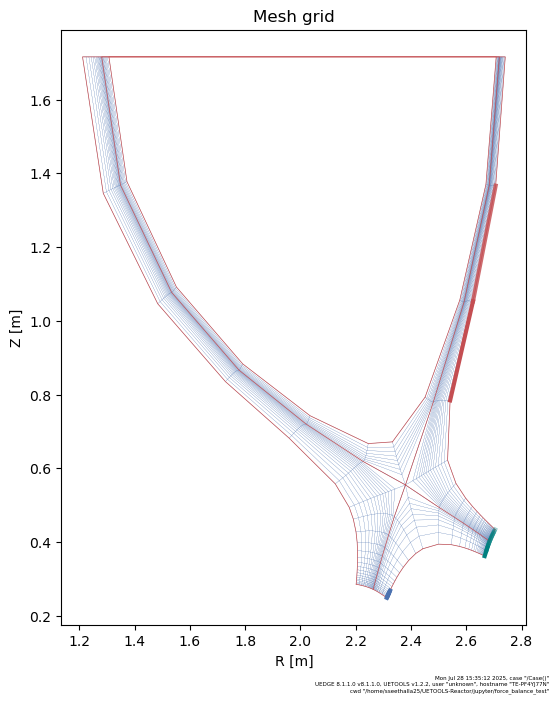

In [42]:
import plot_sinksource
import importlib
importlib.reload(plot_sinksource)
c.populate()
plot_sinksource.plot_sinksource(c)

In [93]:
com.ixpt2[0]

np.int64(28)

np.float64(1.3411038050842534)

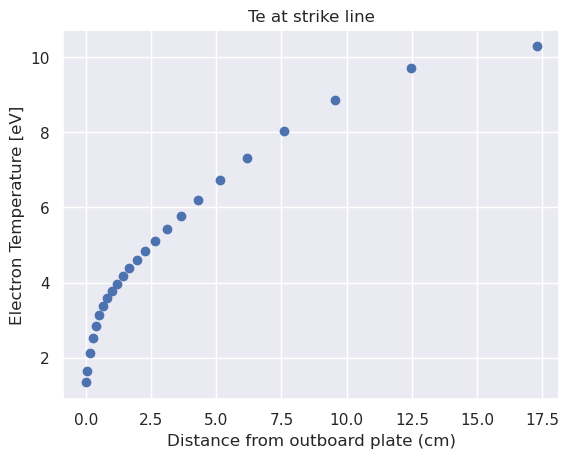

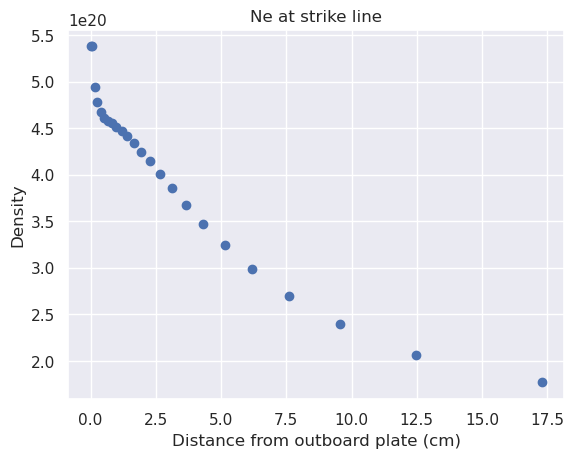

In [4]:
offset = 0.1
var_list = ['te', 'ti', 'nie', 'nn']
z_list = ['z1', 'z2', 'z3']
plasma_vars = {}
for var in var_list:
    plasma_vars[var] = {}

xmin = com.ixpt2[0]+2
zs = com.zm[xmin:,com.iysptrx,0]
rs = com.rm[xmin:,com.iysptrx,0]
dist = np.sqrt((rs - rs[-1])**2 + (zs - zs[-1])**2)
yi = com.ny//2
plasma_vars['te'] = bbb.te[xmin:,com.iysptrx]/bbb.ev
plasma_vars['ti'] = bbb.ti[xmin:,com.iysptrx]/bbb.ev
plasma_vars['nie'] = bbb.ne[xmin:,com.iysptrx]
plasma_vars['nn'] = bbb.ng[xmin:,com.iysptrx, 0]
import seaborn as sns
sns.set_theme()
plt.scatter(dist*100, plasma_vars['te'])
plt.ylabel('Electron Temperature [eV]')
plt.xlabel('Distance from outboard plate (cm)')
# plt.xscale('log')
plt.title(f'Te at strike line')
plt.figure()
plt.scatter(dist*100, plasma_vars['nie'])
plt.ylabel('Density')
plt.xlabel('Distance from outboard plate (cm)')
plt.title(f'Ne at strike line')
plasma_vars['te'][-1]

12 52


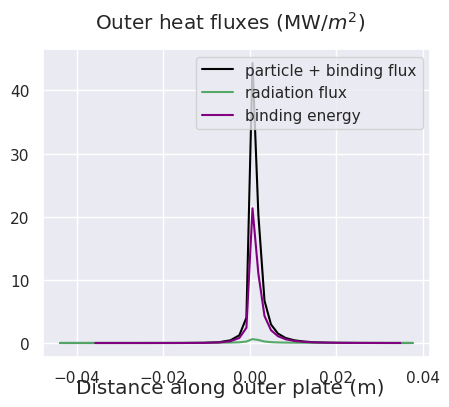

In [5]:
fig, axs = plt.subplots(1, figsize=(5,4))
bbb.fqp=0
bbb.plateflux(); #internally calculated fluxes (postprocessing)
fig.suptitle('Outer heat fluxes (MW/$m^2$)')
fig.supxlabel('Distance along outer plate (m)')
x = com.yyrb[1:-1]
axs.plot(com.yyrb,1.e-6*(bbb.sdtrb), label='particle + binding flux', color='0')
axs.plot(com.yyrb,1.e-6*(bbb.sdrrb), label='radiation flux', color='g')
axs.plot(x, bbb.sbindrb[1:com.ny+1,:]*1e-6, color='purple', label='binding energy')
print(com.nisp,com.nx)
axs.legend()
# plt.savefig('outer_div_plot2.png')
plt.show()


In [9]:
bbb.bcei

2.5

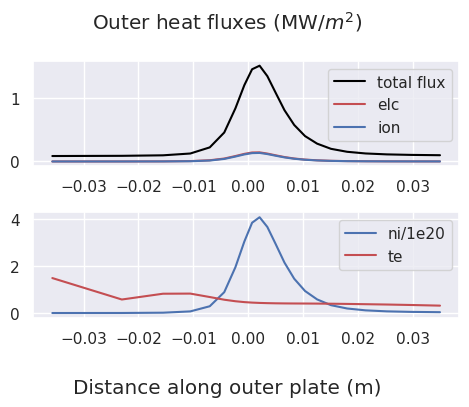

Integrated total heat: 0.022835, radiated heat: 0.007313 MW; f_rad_div: 0.320249


In [16]:
fig, axs = plt.subplots(2, figsize=(5,4))
bbb.fqp=0
bbb.plateflux(); #internally calculated fluxes (postprocessing)
fig.suptitle('Outer heat fluxes (MW/$m^2$)')
fig.supxlabel('Distance along outer plate (m)')
leftIndex = 1
rightIndex = -1
x = com.yyrb[leftIndex:rightIndex]
axs[0].plot(x,1.e-6*(bbb.sdtrb[leftIndex:rightIndex]+bbb.sdrrb[leftIndex:rightIndex]), label='total flux', color='0')
# axs[0].set_ylim([-0.01, 40])
# axs[0].plot(com.yyrb,1.e-6*(bbb.sdrrb)*10, label='radiation flux * 10', color='g')
# axs[0].plot(com.yyrb,1.e-6*bbb.sdrrb*10, label='tot rad flx*10')
# axs[0].legend(fontsize=14)
# axs[0].plot(com.yylb,1.e-6*bbb.sbindrb)
axs[0].plot(x, bbb.sderb[leftIndex:rightIndex]*1e-6, '-r', label='elc')
axs[0].plot(x, bbb.sdirb[leftIndex:rightIndex]*1e-6, '-b', label='ion')
# axs[1].plot(x, bbb.sbindrb[1:com.ny+1,:]*1e-6/5, color='purple', label='binding energy / 5')
# print(com.nisp,com.nx)
# axs[2].plot(x, bbb.engirb[1:com.ny+1,com.nisp-1,com.nxpt-1], '--r', label='ave ion energy')
# axs[2].plot(com.yylb, bbb.pwr_pltz[0:ny+1,2*nxpt), '--b', label='rad')
axs[0].legend()
axs[1].plot(x, bbb.ni[com.nx+1,1:-1,0]/1e20, '-b', label='ni/1e20')
axs[1].plot(x, bbb.te[com.nx+1,1:-1]/bbb.ev, '-r', label='te')
axs[1].legend()
plt.tight_layout()
# axs[3].plot(x, bbb.sbindrb[1:com.ny+1,:]*1e-6, '-r', label='binding energy')
# axs[3].plot(x, bbb.pradhyd[com.nx+1,1:-1]/1e7, '-b', label='prad by hyd * 1e-7')
# axs[3].legend()
plt.savefig('outer_div_plot.png')
plt.show()
com.yyrb.size
np.mean(1.e-6*(bbb.sdrrb))
from scipy.integrate import simpson
rad_heat = simpson(y=(1.e-6*(bbb.sdrrb)).flatten(),x=com.yyrb.flatten())
tot_heat = simpson(y=(1.e-6*(bbb.sdtrb+bbb.sdrrb)).flatten(),x=com.yyrb.flatten())
print(f'Integrated total heat: {tot_heat:3f}, radiated heat: {rad_heat:3f} MW; f_rad_div: {(rad_heat/tot_heat):3f}')

# Inner plate

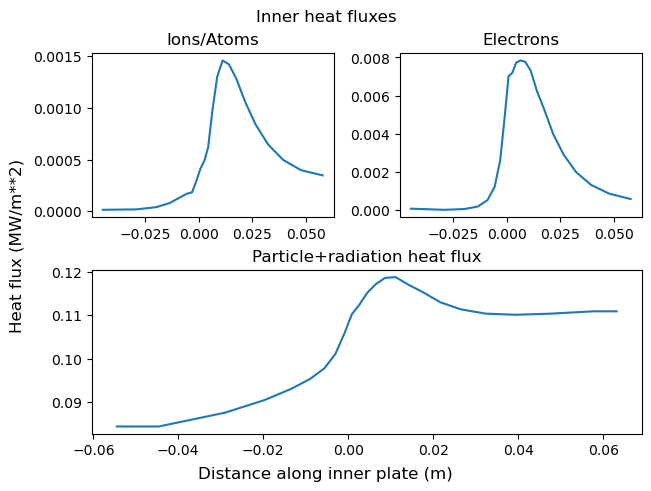

In [33]:
# %matplotlib widget
bbb.fqp=0
bbb.plateflux(); #internally calculated fluxes (postprocessing)

fig, axs = plt.subplot_mosaic(
    [['TopLeft', 'TopRight'],
     ['Bottom', 'Bottom']],
    layout='constrained',  # Automatically adjust layout
    width_ratios=[1, 1],   # Equal width for the top plots
)
fig.suptitle('Inner heat fluxes')
fig.supxlabel('Distance along inner plate (m)')
fig.supylabel('Heat flux (MW/m**2)')
# axs['TopRight'].set_xlabel("Distance along inner plate (m)")
#axs['TopRight'].set_ylabel("feex (W)")
axs['TopRight'].set_title("Electrons")
axs['TopRight'].plot(com.yylb[1:-1],bbb.sdelb[1:-1,0]*1e-6)

# axs['TopLeft'].set_xlabel("Distance along inner plate (m)")
# axs['TopLeft'].set_ylabel("Heat flux (MW/m**2)")
axs['TopLeft'].set_title("Ions/Atoms")
axs['TopLeft'].plot(com.yylb[1:-1],bbb.sdilb[1:-1]*1e-6) #polodal east field area

# axs['Bottom'].set_xlabel("Distance along inner plate (m)")
# axs['Bottom'].set_ylabel("Heat flux [MW/m**2]")
axs['Bottom'].set_title("Particle+radiation heat flux")
axs['Bottom'].plot(com.yylb,1.e-6*(bbb.sdtlb+bbb.sdrlb))
plt.show()

# Outer plate

<Figure size 640x480 with 0 Axes>

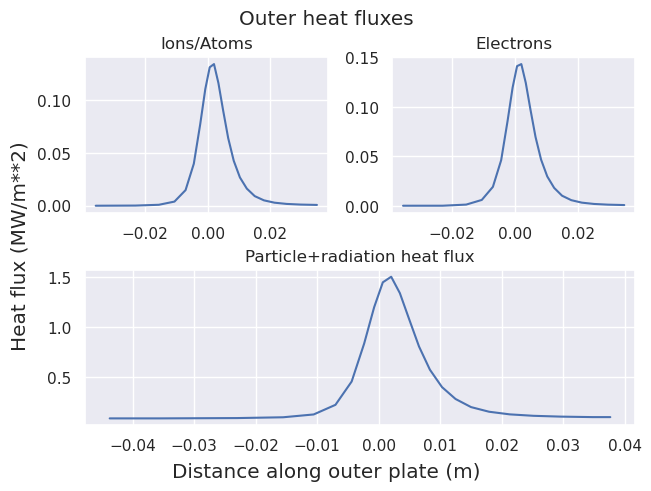

array([1.50664034])

In [15]:
# total convective and conductive heat flux
# 2nd char: e for energy n for particle
bbb.fqp=0
bbb.plateflux(); #internally calculated fluxes (postprocessing)

plt.figure()
fig, axs = plt.subplot_mosaic(
    [['TopLeft', 'TopRight'],
     ['Bottom', 'Bottom']],
    layout='constrained',  # Automatically adjust layout
    width_ratios=[1, 1],   # Equal width for the top plots
)
fig.suptitle('Outer heat fluxes')
fig.supxlabel('Distance along outer plate (m)')
fig.supylabel('Heat flux (MW/m**2)')
# axs['TopRight'].set_xlabel("Distance along inner plate (m)")
#axs['TopRight'].set_ylabel("feex (W)")
axs['TopRight'].set_title("Electrons")
axs['TopRight'].plot(com.yyrb[1:-1],bbb.sderb[1:-1,0]*1e-6)

# axs['TopLeft'].set_xlabel("Distance along inner plate (m)")
# axs['TopLeft'].set_ylabel("Heat flux (MW/m**2)")
axs['TopLeft'].set_title("Ions/Atoms")
axs['TopLeft'].plot(com.yyrb[1:-1],bbb.sdirb[1:-1,0]*1e-6) #polodal east field area


# axs['Bottom'].set_xlabel("Distance along inner plate (m)")
# axs['Bottom'].set_ylabel("Heat flux [MW/m**2]")
axs['Bottom'].set_title("Particle+radiation heat flux")
axs['Bottom'].plot(com.yyrb,1.e-6*(bbb.sdtrb+bbb.sdrrb))
plt.show()
max(1.e-6*(bbb.sdtrb+bbb.sdrrb))

In [ ]:
np.sum( (bbb.sdtrb+bbb.sdrrb)) / 1e6

np.float64(25.673051490542424)

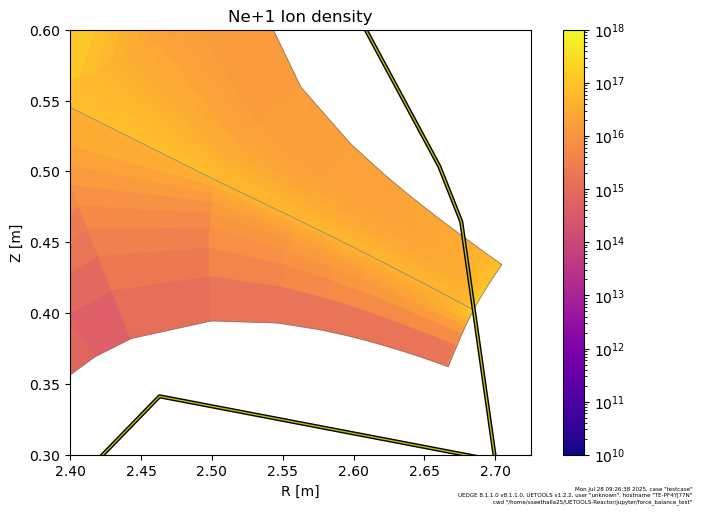

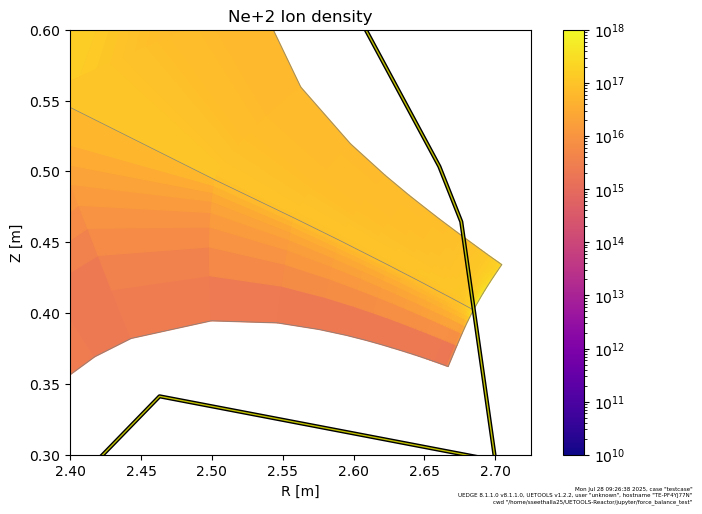

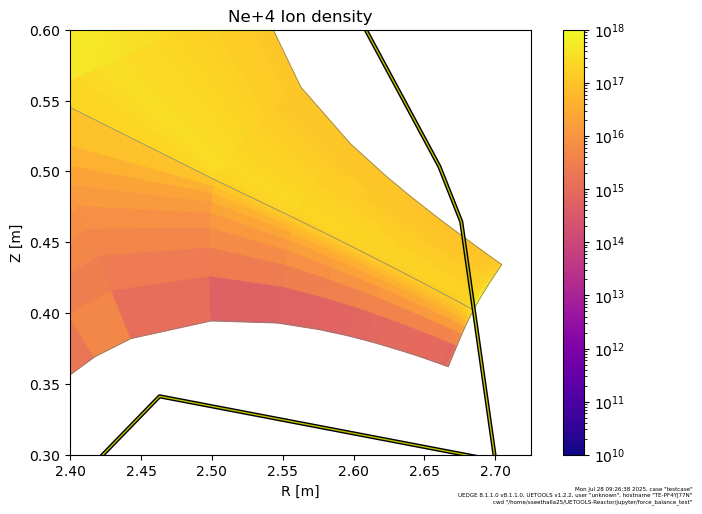

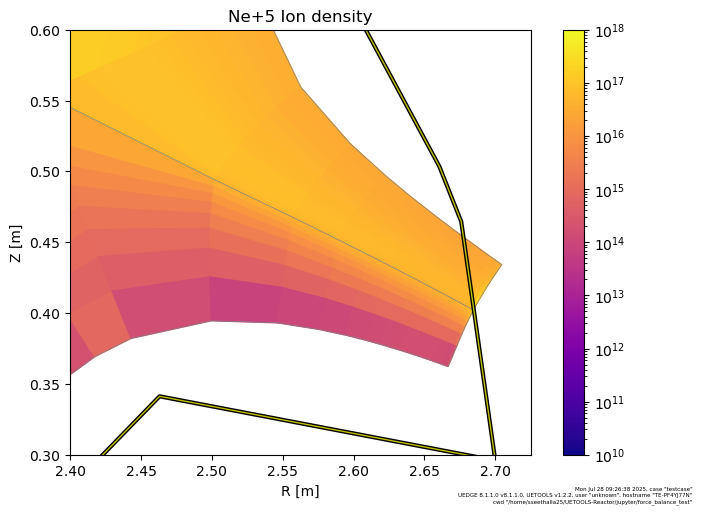

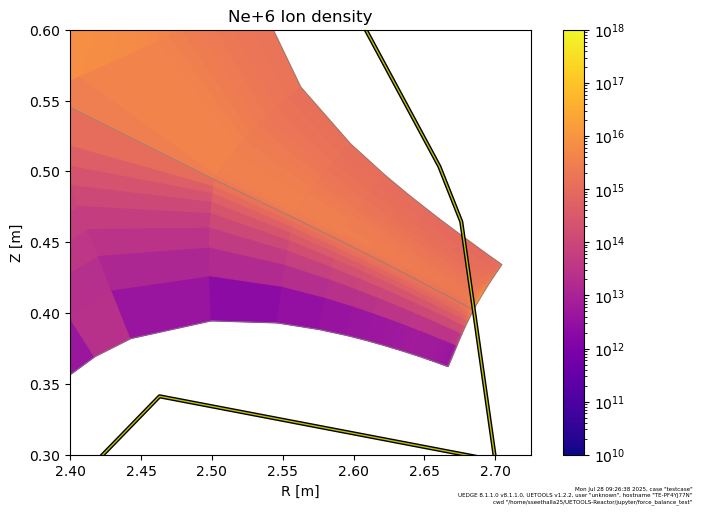

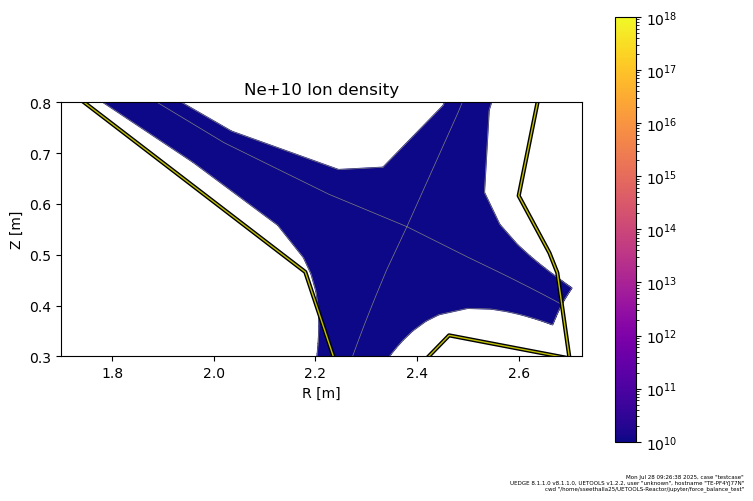

In [13]:
c.plot.mesh(
    bbb.ni[:, :, 2], 
    log=True, 
    cmap='plasma',
    title='Ne+1 Ion density',
    figsize=(7,5), 
    xlim=(2.4, 2.725), 
    ylim=(0.3,0.6), 
    zrange=(1e10,1e18)
);
c.plot.mesh(
    bbb.ni[:, :, 3], 
    log=True, 
    cmap='plasma',
    title='Ne+2 Ion density',
    figsize=(7,5), 
    xlim=(2.4, 2.725), 
    ylim=(0.3,0.6), 
    zrange=(1e10,1e18)
);
c.plot.mesh(
    bbb.ni[:, :, 5], 
    log=True, 
    cmap='plasma',
    title='Ne+4 Ion density',
    figsize=(7,5), 
    xlim=(2.4, 2.725), 
    ylim=(0.3,0.6),
    zrange=(1e10,1e18) 
);
c.plot.mesh(
    bbb.ni[:, :, 6], 
    log=True, 
    cmap='plasma',
    title='Ne+5 Ion density',
    figsize=(7,5), 
    xlim=(2.4, 2.725), 
    ylim=(0.3,0.6),
    zrange=(1e10,1e18) 
);
c.plot.mesh(
    bbb.ni[:, :, 7], 
    log=True, 
    cmap='plasma',
    title='Ne+6 Ion density',
    figsize=(7,5), 
    xlim=(2.4, 2.725), 
    ylim=(0.3,0.6),
    zrange=(1e10,1e18)
);
c.plot.mesh(
    bbb.ni[:, :, -1], 
    log=True, 
    cmap='plasma',
    title='Ne+10 Ion density',
    figsize=(7,5), 
    xlim=(1.7, 2.725), 
    ylim=(0.3,.8),
    zrange=(1e10,1e18)
);

# 2D Plots



*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 9.83e-04



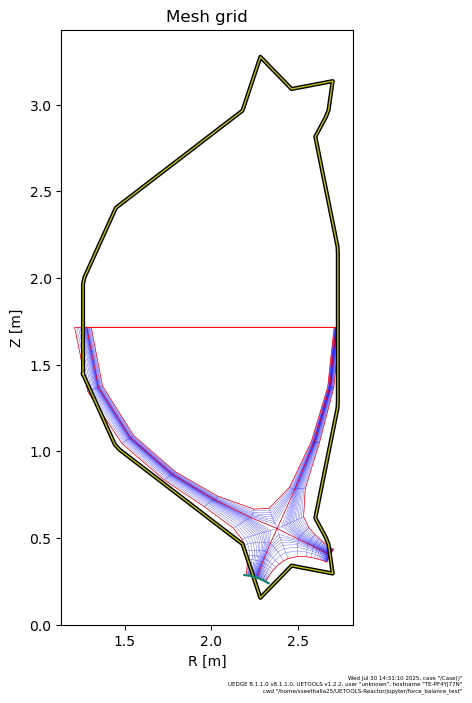

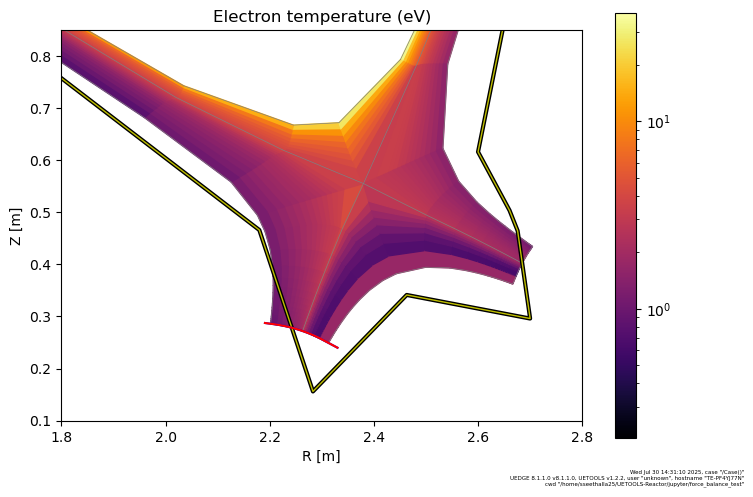

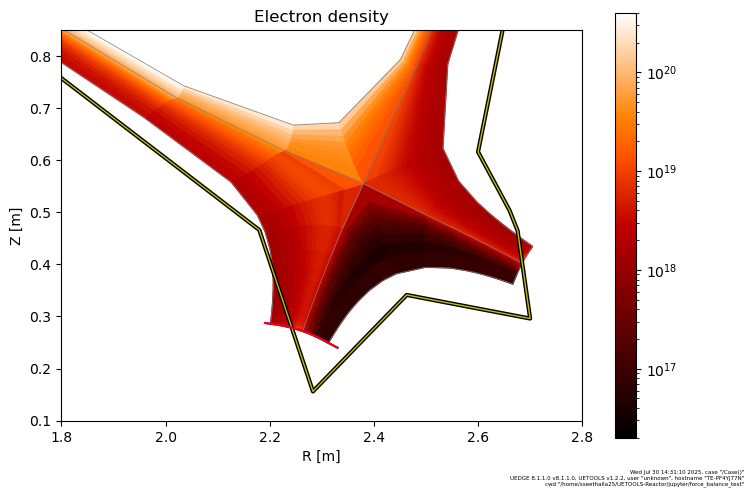

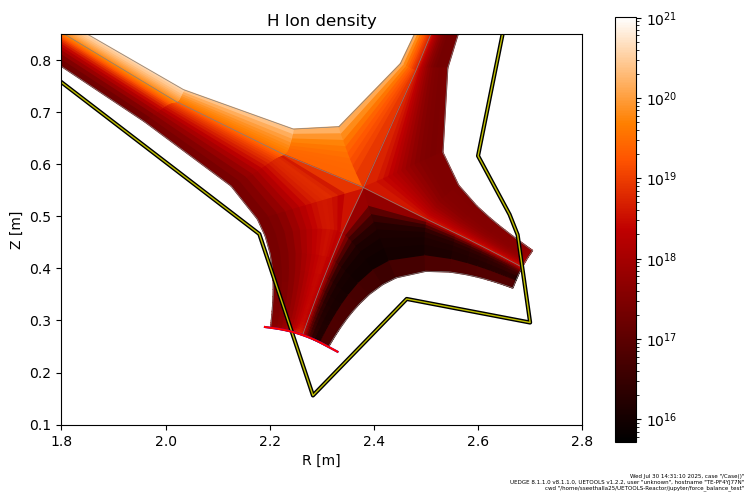

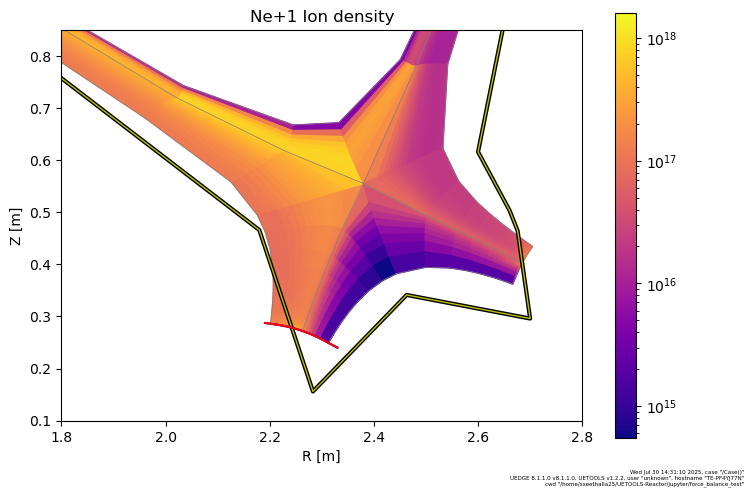

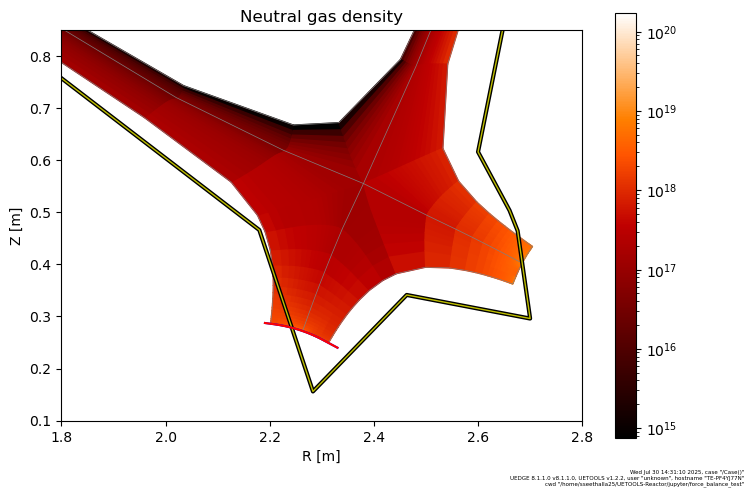

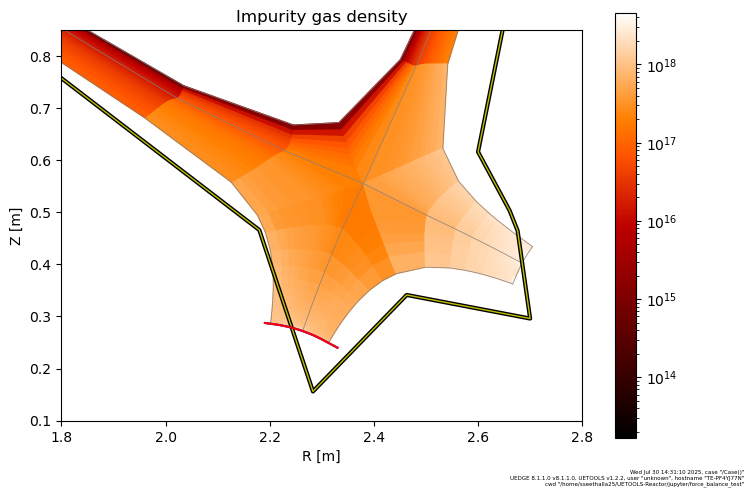

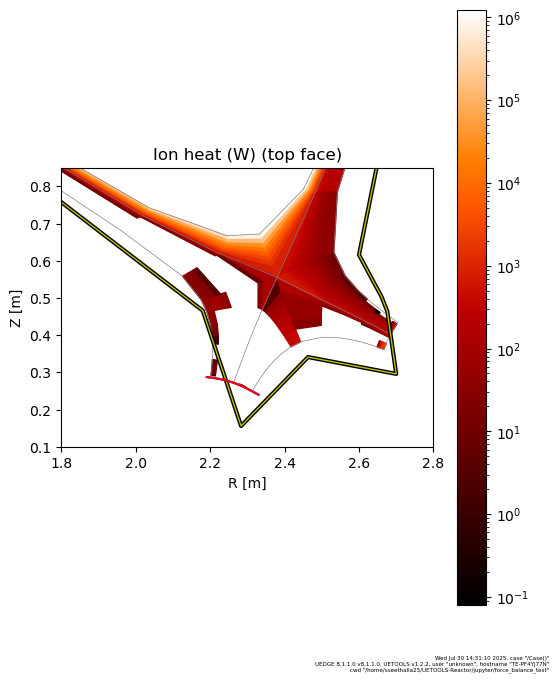

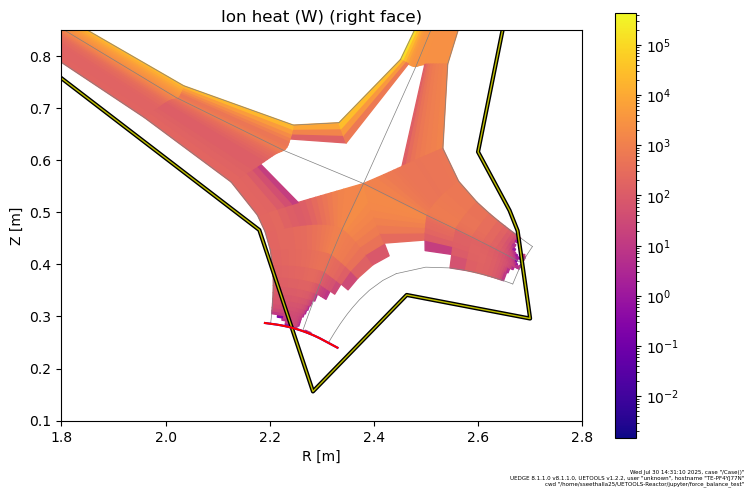

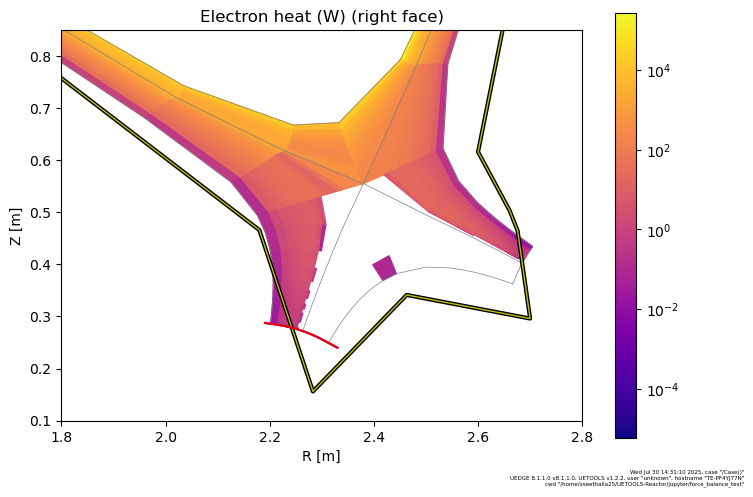

In [3]:
#TODO: neutral pressure
#TODO: compare Figure 16.11 in Stangeby
import seaborn as sns
sns.reset_orig()
c = Case()
c.populate()
c.plot.grid(linewidth=0.1, #grid plot
   vessel=True, 
   plates=True, 
   platecolor=['gold','teal'], 
   lcfs=True, 
   lcfscolor='r', 
   linecolor='b',
   title='Mesh grid',
#    aspect="auto"
  );
c.plot.mesh(
    bbb.te/bbb.ev,
    log=True,
    cmap='inferno',
    title='Electron temperature (eV)',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 

);
c.plot.mesh(
    bbb.ne, 
    log=True, 
    cmap='gist_heat',
    title='Electron density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
    zrange=(4e20, 2e16)
);
c.plot.mesh(
    bbb.ni[:, :, 0], 
    log=True, 
    cmap='gist_heat',
    title='H Ion density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c.plot.mesh(
    bbb.ni[:, :, 2], 
    log=True, 
    cmap='plasma',
    title='Ne+1 Ion density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c.plot.mesh(
    bbb.ng[:, :, 0],
    log=True, 
    cmap='gist_heat',
    title='Neutral gas density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 

);
c.plot.mesh(
    bbb.ng[:,:,1], 
    log=True, 
    cmap='gist_heat',
    title='Impurity gas density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c.plot.mesh(
    bbb.feix, 
    log=True, 
    cmap='gist_heat',
    title='Ion heat (W) (top face)',
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c.plot.mesh(
    bbb.feiy, 
    log=True, 
    cmap='plasma',
    title='Ion heat (W) (right face)',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c.plot.mesh(
    bbb.feey, 
    log=True, 
    cmap='plasma',
    title='Electron heat (W) (right face)',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
plt.show()

In [55]:
bbb.isrecmon  

1

In [ ]:
plt.rcdefaults()
c.dashboard() # a GUI with all the most common variable

QStandardPaths: wrong permissions on runtime directory /run/user/1000/, 0755 instead of 0700
qt.glx: qglx_findConfig: Failed to finding matching FBConfig for QSurfaceFormat(version 2.0, options QFlags<QSurfaceFormat::FormatOption>(), depthBufferSize -1, redBufferSize 1, greenBufferSize 1, blueBufferSize 1, alphaBufferSize -1, stencilBufferSize -1, samples -1, swapBehavior QSurfaceFormat::SingleBuffer, swapInterval 1, colorSpace QSurfaceFormat::DefaultColorSpace, profile  QSurfaceFormat::NoProfile)


In [ ]:
from scipy.integrate import simpson
bbb.fqp=0
bbb.plateflux();

pcore = simpson( (bbb.feiy+bbb.feey)[com.ixpt1[0]+1:com.ixpt2[0]+1,0]) / 1e6
psep = simpson( (bbb.feiy+bbb.feey)[com.ixpt1[0]+1:com.ixpt2[0]+1,com.iysptrx]) / 1e6

print(f' Power from core boundary (surface closest to magnetic axis) = {pcore:.3f} MW  \n \
Power at Separatrix = {psep:.3f} MW  \n \
Power radiated in core region = {(pcore-psep):.3f} MW = {((abs(pcore-psep)/pcore)*100):3f}%')
particlecore = simpson( (bbb.fniy)[com.ixpt1[0]+1:com.ixpt2[0],0])

pleft = simpson( (bbb.feiy+bbb.feey)[com.ixpt1[0]+1:32,com.iysptrx]) / 1e6
pright = simpson( (bbb.feiy+bbb.feey)[32:com.ixpt2[0]+1,com.iysptrx]) / 1e6
print(f'From LCFS, {(pright/pleft):.3f} times more power going out into high field side than low field side\n Left:{pleft} MW | Right: {pright} MW')

 Power from core boundary (surface closest to magnetic axis) = 7.437 MW  
 Power at Separatrix = 4.048 MW  
 Power radiated in core region = 3.389 MW = 45.575846%
From LCFS, 0.000 times more power going out into high field side than low field side
 Left:3.971156967239356 MW | Right: 0.0 MW


In [ ]:
impFracs = [1e-4, 3e-3, 3e-2]
pRads = [33.11, 33.9, 42.5]

In [18]:
c.search.var("n0g")


Package:    bbb
Group:      Ynorm
Attributes: Ynorm 
Dimension:  (6)
            (6)
Type:       double
Address:    140620855154944
Pyaddress:  140620858888368
Unit:       m**-3
Comment:
normalization gas density


In [ ]:
len(bbb.te[28])

46